# Personalized Movie Recommendations: A Collaborative Filtering Approach

## 1. Business Understanding
### (a) Introduction

CineCollab, established in 2006, has been at the forefront of digital entertainment, captivating audiences worldwide with a rich collection of films and sophisticated recommendation systems. Our success is deeply rooted in our commitment to elevating user experiences through advanced analytics.

This project mirrors CineCollab's dedication, with a focus on refining recommendation systems. We develop complex predictive models, taking into account factors such as individual viewing habits and user behaviors. By mapping these variables, we intend to work closely with CineCollab to boost the precision and effectiveness of its recommendation algorithm.

The MovieLens dataset plays a pivotal role in realizing this objective. Users can rate movies, and our model harnesses these ratings to craft personalized recommendations. The hurdle lies in designing a system that accurately deciphers user ratings and converts them into relevant film suggestions.

The core business problem we tackle is optimizing user engagement by delivering desired movie recommendations. This involves understanding user preferences based on ratings and creating an intuitive and user-friendly platform for users to provide these ratings. We attempt to maintain a balance between simplicity and capturing nuanced user preferences to ensure the recommendations are both accurate and well-received.

In essence, our project seeks to transform the way users rate movies and receive recommendations, aligning with CineCollab's ongoing commitment to personalized content discovery. Through our model, we aim to not only enhance efficiency but also provide a seamless and enriching experience for users globally, delivering top-notch movie recommendations tailored to their unique tastes and preferences.

### (b) Problem Statement

Online streaming platforms are the dominant form of media consumption but viewers often face a paradox of choice when presented with the entire catalogue. Users struggle to navigate through massive catalogues, leading to subscriber frustration and an increased likelihood of churn. By leveraging the MovieLens dataset comprised of over 100,000 ratings applied to nearly 10,000 films by hundreds of users, we intend to push CineCollabs recommendation algorithm forward. Enhancing recommendations based upon movies streamers prefer has the potential to improve CineCollab's user experience and to help audiences discover unexplored content that matches their interests. This project, implemented successfully will  promote media discovery, encourage niche, cult-like viewers and inspire artistry through expanded access to cinema. Building a working, accurate recommendation system will be the key to unlocking the full creative and commercial potential of CineCollab.

### (c) Defining Metrics of Success

The success of a movie recommendation model using collaborative filtering can be assessed using various metrics that measure its effectiveness in providing accurate and relevant movie suggestions. The combination of the metrics provides a comprehensive understanding of its performance in terms of accuracy, relevance, and user satisfaction. It's essential to choose metrics that align with the specific goals and objectives of the recommendation system and the preferences of the user base.

### (d) Research Questions

1. What features contribute most to the accuracy of collaborative filtering in generating top  movie recommendations?

2. How does the frequency of user ratings influence the accuracy and stability of the movie recommendation model?

3. What are the correlation between user ratings and various movie features?

4. Which movie features demonstrate the highest correlation with collaborative filtering recommendations, and how do they impact the model's predictions?

5. How successful is the collaborative filtering model in providing accurate and tailored movie recommendations based on user ratings and preferences?

### (e) The Main Objective

To develop and implement a movie recommendation system that leverages collaborative filtering techniques to provide personalized top 5 movie recommendations for users.

### (f) The Specific Objectives

1. To clean and preprocess the MovieLens datasets to ensure it is suitable for building a recommendation system.

2. To understand the distribution of movie ratings, explore user behavior, and identify patterns in the datasets.

3. To investigate and compare collaborative filtering techniques for building the recommendation system, such as Singular Value Decomposition (SVD), user-based and item-based.

4. To implement and evaluate the performance of the collaborative filtering model using appropriate metrics such as RSME and MSE.

5. To generate top 5 movie recommendations for a user based on their historical ratings.

### (g) Data Understanding

The MovieLens dataset (ml-latest-small) provides a comprehensive snapshot of user preferences and interactions within the MovieLens movie recommendation service. This dataset, created by 610 users over a period spanning from March 29, 1996, to September 24, 2018, is a valuable resource for gaining insights into user behavior, preferences, and movie metadata.
It has 9 attributes.

**Attributes:**

1. **movieId:** Identifier for movies used by MovieLens.
2. **title:** Contains the names of individual movies and serves as a unique identifier for each film within the dataset.
3. **genres:** Classifies films based on overarching themes, narrative structures, and intended emotional impact.
4. **imdbId:** Identifier associated with a movie on the IMDb (Internet Movie Database) platform.
5. **tmdbId:** Identifier associated with movies on TMDb (The Movie Database).
6. **rating:** Numerical evaluation given by users on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
7. **timestamp:** represents seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
8. **tags:** User-generated metadata about movies. Each tag is typically a single word or short phrase, with meaning, value, and purpose determined by each user.
9. **userId:** Unique identifier assigned to each user who participated in movie rating and tagging activities.


**Dataset Statistics:**

100,836 ratings and 3,683 tag applications.
9,742 movies encompassing a diverse array of genres.



# Data Cleaning

In [1]:
#importing relevant packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create data frames 
movies = pd.read_csv("data/ml-latest-small/movies.csv")
links = pd.read_csv("data/ml-latest-small/links.csv")
ratings = pd.read_csv("data/ml-latest-small/ratings.csv")
tags = pd.read_csv("data/ml-latest-small/tags.csv")

In [3]:
#reading the first 3 rows
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
#reading the first 3 rows
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [5]:
#reading the first 3 rows
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [6]:
#reading the first 3 rows
tags.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [7]:
#merge movies and links on 'movieId'
df = pd.merge(movies, links, on='movieId')

#merge with ratings on 'movieId'
df = pd.merge(df, ratings, on='movieId')

#merge with tags on 'movieId'
df = pd.merge(df, tags, on='movieId')

df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,474,pixar,1137206825


In [15]:
df.shape

(233213, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   movieId   233213 non-null  int64  
 1   title     233213 non-null  object 
 2   genres    233213 non-null  object 
 3   imdbId    233213 non-null  int64  
 4   tmdbId    233213 non-null  float64
 5   userId_x  233213 non-null  int64  
 6   rating    233213 non-null  float64
 7   userId_y  233213 non-null  int64  
 8   tag       233213 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 17.8+ MB


In [14]:
df.describe()

,movieId,imdbId,tmdbId,userId_x,rating,userId_y
count,233213.000000,2.332130e+05,233213.000000,233213.000000,233213.000000,233213.000000
mean,12319.999443,2.610632e+05,9378.277742,309.688191,3.966535,470.683564
std,28243.919401,4.414411e+05,36943.139800,178.206387,0.968637,153.329632
min,1.000000,1.234900e+04,11.000000,1.000000,0.500000,2.000000
25%,296.000000,1.103570e+05,278.000000,156.000000,3.500000,424.000000
50%,1198.000000,1.109120e+05,680.000000,309.000000,4.000000,477.000000
75%,4638.000000,1.724950e+05,1892.000000,460.000000,5.000000,599.000000
max,193565.000000,5.580390e+06,503475.000000,610.000000,5.000000,610.000000


In [8]:
columns_to_drop = ['timestamp_x', 'timestamp_y']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFram
df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,userId_y,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,567,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,336,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,474,pixar


In [9]:
df.isnull().sum()

movieId     0
title       0
genres      0
imdbId      0
tmdbId      0
userId_x    0
rating      0
userId_y    0
tag         0
dtype: int64

In [10]:
df.duplicated().sum()

0

# EDA

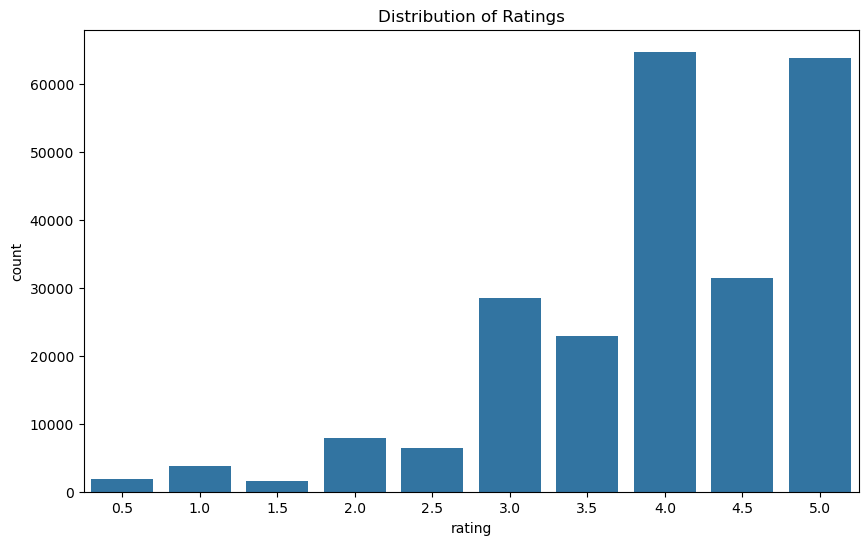

In [25]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

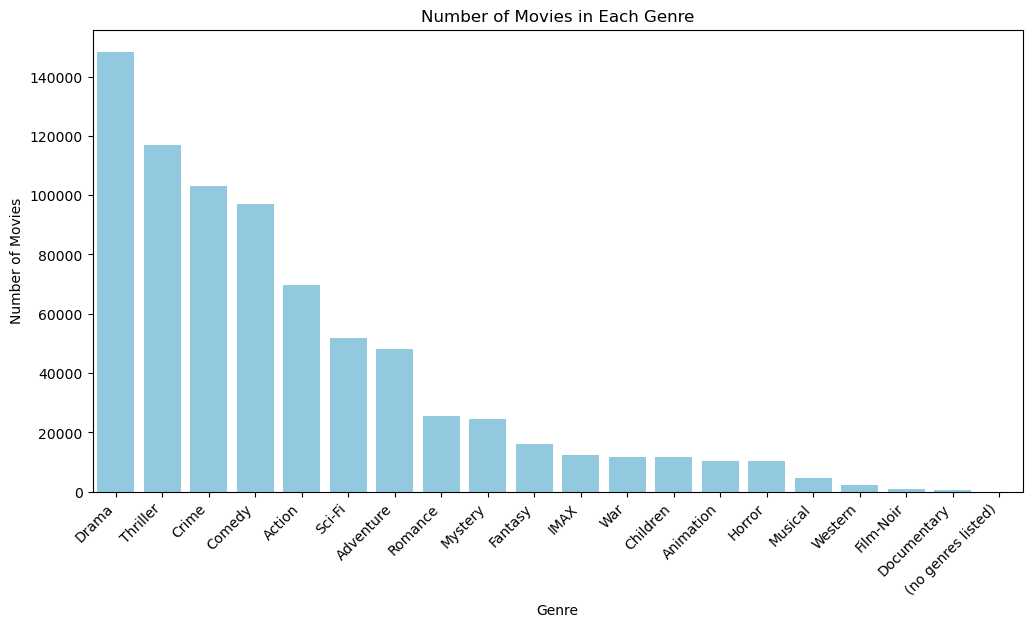

In [26]:
# Split genres and create a count of each genre
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.show()

C:\Users\gicho\AppData\Local\Temp\ipykernel_6316\2928043660.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=top_rated_movies, palette='muted', orient='h')


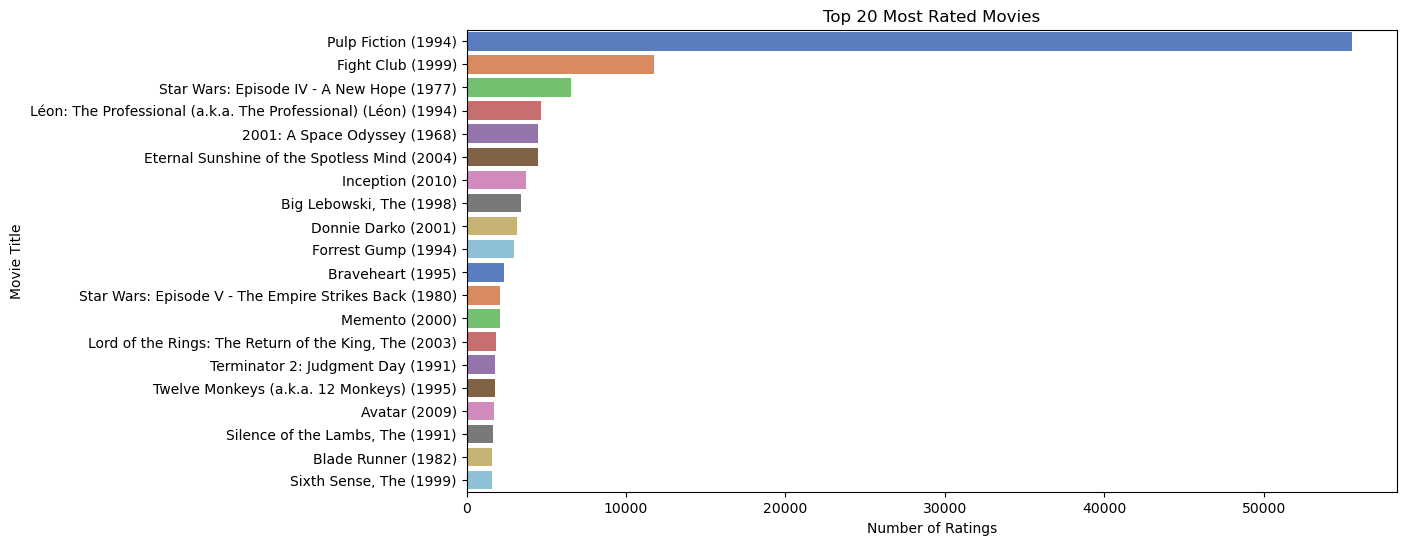

In [28]:
# Calculate the top N most rated movies
top_rated_movies = df.groupby('movieId')['rating'].count().sort_values(ascending=False).head(20)
top_rated_movies = pd.merge(top_rated_movies, df[['movieId', 'title']], on='movieId', how='left')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=top_rated_movies, palette='muted', orient='h')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()